# SVD and PCA

In this notebook, we will learn how SVD and PCA are related. We can use SVD to do principal component analysis, and find that the principal components are the right singular vectors from the SVD, i.e., the columns of $V$ in the SVD decomposition, $A = U\Sigma V^T$. 

To see this, we need to recall how to diagonalize a matrix with its eigenvalues and eigenvectors. 

A symmetric matrix $A \in \mathbb{R}^{n \times n}$ can be diagonalized using its eigenvalues and eigenvectors. If $A$ has eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_n$ and corresponding eigenvectors $\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_n$, then we can write
\begin{equation}
A = V \Lambda V^T,
\end{equation}
where $V = [\mathbf{v}_1 \mid \mathbf{v}_2 \mid \cdots \mid \mathbf{v}_n]$ is the matrix whose columns are the eigenvectors, and $\Lambda = \text{diag}(\lambda_1, \lambda_2, \ldots, \lambda_n)$ is the diagonal matrix of eigenvalues.

For a symmetric matrix, the eigenvectors are orthogonal, so $V^T V = I$ and $V$ is an orthogonal matrix. This decomposition is called the eigendecomposition or spectral decomposition.

---

**Setup**

For PCA, we have a data matrix $X \in \mathbb{R}^{n \times p}$ where $n$ is the number of observations (data points) and $p$ is the number of features (dimensions). Each row represents one observation.

PCA requires centering the data by subtracting the mean of each feature
\begin{equation}
X_{\text{centered}} = X - \bar{X},
\end{equation}
where $\bar{X}$ is a matrix where each row contains the mean of all observations.

PCA finds the principal components by analyzing the covariance matrix. By definition, the covariance matrix is
\begin{equation}
\begin{split} 
C & = \frac{1}{n-1}(X - \bar{X})^T (X - \bar{X}) \\
& = \frac{1}{n-1}X_{\text{centered}}^T X_{\text{centered}}.
\end{split} 
\end{equation}

Let us examine the SVD decomposition of the centered data
\begin{equation}
X_{\text{centered}} = U \Sigma V^T.
\end{equation}

The right singular vectors $V$ are exactly the principal components (eigenvectors of $C$). To see this, we can verify that $V$ diagonalizes the covariance matrix
\begin{align}
C &= \frac{1}{n-1}X_{\text{centered}}^T X_{\text{centered}} \\
&= \frac{1}{n-1}(U\Sigma V^T)^T (U\Sigma V^T) \\
&= \frac{1}{n-1}V\Sigma^T U^T U\Sigma V^T \\
&= \frac{1}{n-1}V\Sigma^2 V^T,
\end{align}
where we used $U^T U = I$ in the last step. This is the eigendecomposition of $C$. Therefore, the columns of $V$ are the principal components, and the variances along these principal components are $\frac{\sigma_i^2}{n-1}$.

---

**Practical Implementation of SVD**

Traditional PCA involves centering the data, computing the covariance matrix $C = \frac{1}{n-1}X^T X$, computing the eigendecomposition of $C$, and extracting the principal components as the eigenvectors.

PCA via SVD involves centering the data, computing the SVD $X_{\text{centered}} = U\Sigma V^T$, and extracting the principal components as the columns of $V$. The variance explained by each component is $\frac{\sigma_i^2}{n-1}$.

There are several advantages to computing PCA via SVD:
- **Numerical stability**: SVD is more numerically stable than computing $X^T X$ followed by an eigendecomposition
- **Efficiency**: For tall matrices ($n \gg p$), SVD can be more efficient
- **Avoids precision loss**: Does not require forming $X^T X$ explicitly, which can lose precision

Professional-grade implementations of PCA (such as `sklearn.decomposition.PCA`) use SVD internally for these reasons.

---

**Example Exercise**

Let us verify the SVD approach to PCA by comparing the SVD method to the eigenvalue method and sklearn results. We generate data from a bivariate normal distribution with a known mean and covariance matrix determined by $\sigma_x$, $\sigma_y$, and $\rho$.

**Bivariate Normal Distribution**

A bivariate normal distribution has a probability density function $\phi$ given by
\begin{equation}
\phi(\mathbf{x}) = \frac{1}{2\pi\sqrt{|\Sigma|}} \exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})\right),
\end{equation}
where $\mathbf{x} = (x_1, x_2)$ is a two-component vector of outcomes, $\boldsymbol{\mu}$ is a vector denoting the mean along the $x_1$ and $x_2$ directions, respectively, and $\Sigma$ is the covariance matrix. The probability density function $\phi$ represents the probability density to draw an outcome $\mathbf{x} = (x_1, x_2)$. More specifically, $\phi(\mathbf{x})dx_1 dx_2$ is the probability to find $\mathbf{x} = (x_1, x_2)$ in the infinitesimal rectangle $[x_1, x_1 + dx_1] \times [x_2, x_2 + dx_2]$.

The covariance matrix $\Sigma$ is a symmetric, positive definite matrix that represents the variance and covariance between multidimensional random variables. For the bivariate case, the covariance matrix can be constructed from the correlation coefficient $\rho$
\begin{equation}
\Sigma = \begin{bmatrix} \sigma_x^2 & \rho\sigma_x \sigma_y \\ \rho\sigma_x \sigma_y & \sigma_y^2
\end{bmatrix},
\end{equation}
where $\sigma_x$ and $\sigma_y$ are the standard deviations in the $x$ and $y$ directions. Note that the covariance matrix is symmetric: $\Sigma^T = \Sigma$.

The correlation coefficient $\rho$ is a number between $-1$ and $1$. When $\rho = 0$, the distributions along each axis are uncorrelated. When $\rho = 1$, the distributions are maximally positively correlated, and when $\rho = -1$, they are maximally negatively correlated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ============================================================================
# Generate Data from Bivariate Normal Distribution
# ============================================================================

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters for bivariate normal distribution
n = 500  # Number of observations
mu_x, mu_y = 3.0, 4.0  # Means
sigma_x, sigma_y = 2.5, 4.0  # Standard deviations
rho = 0.6  # Correlation coefficient

# Construct mean vector and covariance matrix
mean = np.array([mu_x, mu_y])
cov_matrix = np.array([
    [sigma_x**2, rho * sigma_x * sigma_y],
    [rho * sigma_x * sigma_y, sigma_y**2]
])

print("True Covariance Matrix:")
print(cov_matrix)
print()

# Generate data
X = np.random.multivariate_normal(mean, cov_matrix, size=n)

print(f"Data shape: {X.shape}")
print(f"Data mean: {X.mean(axis=0)}")
print(f"Sample covariance:\n{np.cov(X.T)}")

True Covariance Matrix:
[[ 6.25  6.  ]
 [ 6.   16.  ]]

Data shape: (500, 2)
Data mean: [2.93495196 4.01364237]
Sample covariance:
[[ 5.8228266   5.41899649]
 [ 5.41899649 15.15016765]]


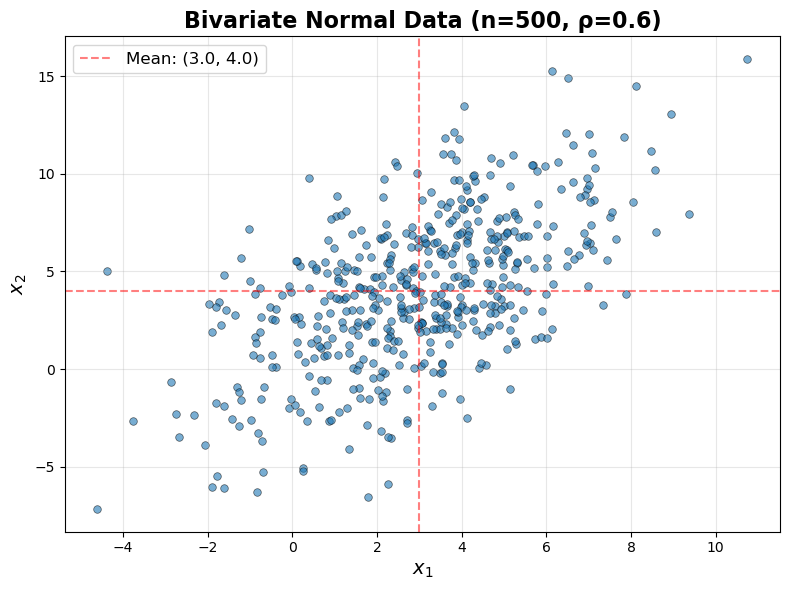


Correlation coefficient: 0.6
Standard deviations: σ_x = 2.5, σ_y = 4.0


In [2]:
# ============================================================================
# Visualize Generated Data
# ============================================================================

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.scatter(X[:, 0], X[:, 1], alpha=0.6, s=30, edgecolors='k', linewidths=0.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title(f'Bivariate Normal Data (n={n}, ρ={rho})', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=mu_y, color='red', linestyle='--', alpha=0.5, label=f'Mean: ({mu_x:.1f}, {mu_y:.1f})')
ax.axvline(x=mu_x, color='red', linestyle='--', alpha=0.5)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

print(f"\nCorrelation coefficient: {rho}")
print(f"Standard deviations: σ_x = {sigma_x}, σ_y = {sigma_y}")

In [6]:
# ============================================================================
# Method 1: Traditional PCA via Eigendecomposition
# ============================================================================

print("Method 1: Traditional PCA (Eigendecomposition)")
print("-"*60)

# Center the data
X_centered = X - X.mean(axis=0)

# Compute sample covariance matrix
C = (X_centered.T @ X_centered) / (n - 1)

print("\nSample Covariance Matrix:")
print(C)

# Compute eigendecomposition
eigenvalues, eigenvectors = np.linalg.eig(C)

# Sort by eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues (variances):")
print(eigenvalues)

print("\nEigenvectors (principal components):")
print(eigenvectors)

print("\nVariance explained (%):")
print(eigenvalues / eigenvalues.sum() * 100)

Method 1: Traditional PCA (Eigendecomposition)
------------------------------------------------------------

Sample Covariance Matrix:
[[ 5.8228266   5.41899649]
 [ 5.41899649 15.15016765]]

Eigenvalues (variances):
[17.63599681  3.33699744]

Eigenvectors (principal components):
[[-0.41694888 -0.90892994]
 [-0.90892994  0.41694888]]

Variance explained (%):
[84.08907475 15.91092525]


In [7]:
# ============================================================================
# Method 2: PCA via SVD
# ============================================================================

print("\nMethod 2: PCA via SVD")
print("-"*60)

# Center the data (already done above, but included for clarity)
X_centered = X - X.mean(axis=0)

# Compute SVD
U, sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Extract principal components (columns of V)
principal_components_svd = Vt.T

# Compute variances from singular values
variances_svd = (sigma**2) / (n - 1)

print("\nSingular values:")
print(sigma)

print("\nVariances (σ² / (n-1)):")
print(variances_svd)

print("\nPrincipal components (right singular vectors):")
print(principal_components_svd)

print("\nVariance explained (%):")
print(variances_svd / variances_svd.sum() * 100)


Method 2: PCA via SVD
------------------------------------------------------------

Singular values:
[93.81024682 40.80639314]

Variances (σ² / (n-1)):
[17.63599681  3.33699744]

Principal components (right singular vectors):
[[-0.41694888 -0.90892994]
 [-0.90892994  0.41694888]]

Variance explained (%):
[84.08907475 15.91092525]


In [8]:
# ============================================================================
# Method 3: sklearn PCA
# ============================================================================

print("\nMethod 3: sklearn PCA")
print("-"*60)

# Create PCA object and fit to data
pca = PCA(n_components=2)
pca.fit(X)

print("\nVariances (explained variance):")
print(pca.explained_variance_)

print("\nPrincipal components:")
print(pca.components_.T)  # Transpose to match our convention

print("\nVariance explained (%):")
print(pca.explained_variance_ratio_ * 100)


Method 3: sklearn PCA
------------------------------------------------------------

Variances (explained variance):
[17.63599681  3.33699744]

Principal components:
[[ 0.41694888  0.90892994]
 [ 0.90892994 -0.41694888]]

Variance explained (%):
[84.08907475 15.91092525]
